In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# **自动选择特征**

## 1. 基于统计方法的自动特征选择


In [4]:
from sklearn.model_selection import train_test_split

在原有乳腺癌肿瘤数据30特征的基础上，在额外添加50列噪音数据作为50个特征数据

In [5]:
from sklearn.datasets import load_breast_cancer


cancer = load_breast_cancer()

rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
X_w_noise = np.hstack([cancer.data, noise])


X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)

In [6]:
X_w_noise.shape

(569, 80)

### `SelectPercentile`根据最高分数的百分位数选择特征

`f_classif`依据ANOVA的F检验进行筛选

In [7]:
from sklearn.feature_selection import SelectPercentile, f_classif


select = SelectPercentile(percentile=50, score_func=f_classif)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print("X_train's shape: ", X_train.shape)
print("X_train_selected's shape: ", X_train_selected.shape)

X_train's shape:  (284, 80)
X_train_selected's shape:  (284, 40)


<BR>
各特征检验的$p$-values

In [10]:
select.pvalues_

array([5.51640514e-45, 3.46425322e-11, 2.18645080e-47, 9.70050454e-40,
       9.58087702e-11, 1.00442540e-30, 9.92655032e-44, 9.27901830e-60,
       8.25490889e-09, 6.18634916e-01, 1.28757935e-22, 4.50659277e-01,
       1.98980582e-21, 7.05784521e-19, 1.72753337e-01, 5.34478580e-05,
       2.80222836e-03, 2.12916331e-09, 8.83540332e-01, 6.59871003e-01,
       5.58240697e-55, 3.79831322e-14, 4.76970683e-56, 3.01032050e-44,
       2.00672452e-15, 3.06147039e-29, 7.85629961e-40, 1.96090436e-68,
       1.26566849e-14, 8.21971053e-08, 4.75817399e-01, 6.39428907e-01,
       8.66981267e-01, 5.30249526e-02, 4.43246139e-01, 5.48773945e-02,
       8.90389380e-01, 6.53613179e-01, 1.31606460e-01, 5.04333205e-01,
       7.80060310e-01, 6.68306737e-01, 8.13067647e-01, 4.17384146e-02,
       6.96012406e-01, 5.39231778e-01, 2.13081205e-01, 2.35501173e-01,
       7.18450939e-01, 2.09324230e-01, 7.66702129e-01, 4.77523523e-02,
       7.81849018e-01, 2.93246013e-01, 9.15986708e-01, 5.51228305e-01,
      

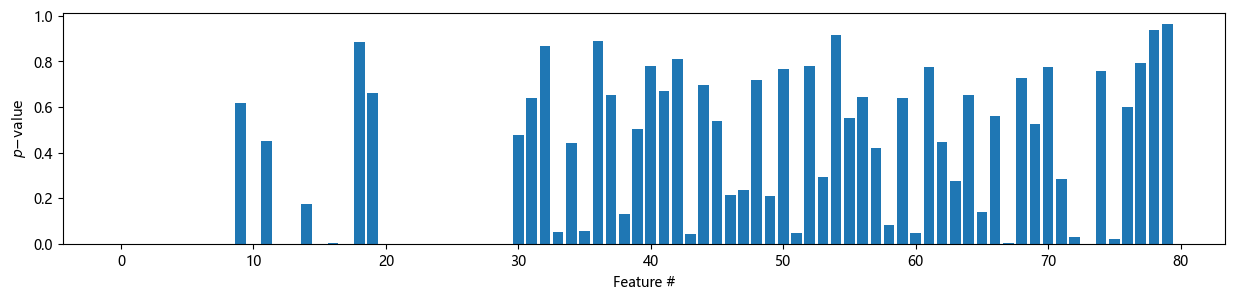

In [11]:
plt.figure(figsize=(15, 3))
plt.bar(np.arange(X_train.shape[-1]), select.pvalues_, width=.8)
plt.ylabel('$p\mathrm{-value}$'); plt.xlabel('Feature #');

注意： $p$-value是越小越统计意义上的拒绝原假设，那么这个原假设是什么？

<br>

将$p\mathrm{-value}$取10为底的对数

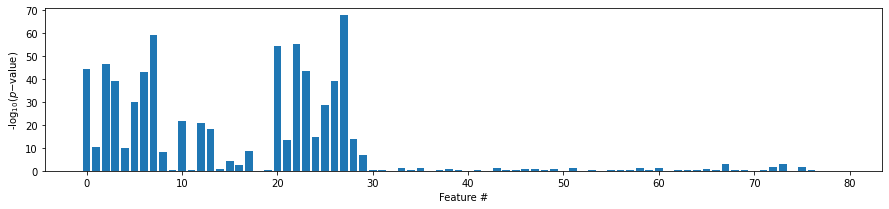

In [39]:
plt.figure(figsize=(15, 3))
plt.bar(np.arange(X_train.shape[-1]), -np.log10(select.pvalues_), width=.8)
plt.ylabel('-$\log_{10}(p\mathrm{-value})$'); plt.xlabel('Feature #');

In [52]:
print(select.get_support())  # 特征是否被选择

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


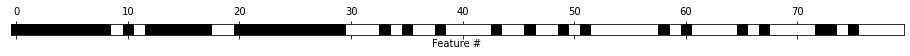

In [53]:
# 可视化，黑为True,白为False
plt.matshow(select.get_support().reshape(1,-1), cmap='gray_r')
plt.xlabel("Feature #"); plt.yticks(());

注意：上述结果选择部分显然我们估计掺入的噪音特征

<BR>
原数据集30个特征模型

In [12]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(solver='lbfgs', max_iter=4000)
model.fit(X_train[:,:30], y_train)


print("Testing F1-score: ", f1_score(model.predict(X_test[:,:30]), y_test))


print("\nCoefficients of features: ", model.coef_.shape, "\n", model.coef_)

Testing F1-score:  0.967032967032967

Coefficients of features:  (1, 30) 
 [[ 0.65328532  0.1345178  -0.17037358  0.02917847 -0.09194071 -0.15166624
  -0.3389174  -0.18818888 -0.22533123 -0.01958973 -0.0562215   0.36404793
  -0.00382949 -0.06690605 -0.01020536  0.03119628 -0.04576231 -0.02778539
  -0.03675496  0.008296    0.1938574  -0.32387554 -0.20899073 -0.01646899
  -0.15725667 -0.31217827 -0.86228139 -0.37823341 -0.44875621 -0.04627409]]


<BR>
全掺噪音80个特征的模型

In [13]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(solver='lbfgs', max_iter=4000)
model.fit(X_train, y_train)


print("Testing F1-score: ", f1_score(model.predict(X_test), y_test))


print("\nCoefficients of features: ", model.coef_.shape, "\n", model.coef_)

Testing F1-score:  0.9613259668508287

Coefficients of features:  (1, 80) 
 [[ 0.21339487  0.22914248 -0.17615005  0.04691873 -0.0270406  -0.0438705
  -0.09959284 -0.05641792 -0.06151557 -0.00535593 -0.01837546 -0.07275312
  -0.03862696 -0.13037354 -0.00343908  0.01613076 -0.00220515 -0.00549288
  -0.00811892  0.00317925  0.08068338 -0.59222764 -0.3264479  -0.02500218
  -0.04900717 -0.06562921 -0.22524987 -0.09280471 -0.11324446 -0.01585882
  -0.0955016  -0.10278177  0.16459924  0.59158202  0.17008539  0.23610779
  -0.27110419  0.26887639  0.03542008 -0.5052205   0.21473512 -0.17257478
   0.18672672 -0.54404845 -0.70924168  0.18464462 -0.00605197 -0.57539268
  -0.36556368 -0.49254752 -0.31013683  0.82795304 -0.08918482 -0.39613761
   0.43758166  0.10481642 -0.08288871 -0.71994326  0.97211685  0.43573617
  -0.1798641   0.53200245 -0.33459251 -0.64167171 -0.32969704 -0.15707157
   0.04625861  0.49762961 -0.12598616 -0.51533244  0.23673322  0.52914168
  -0.3687018   0.68605164  0.01091521

<BR>
按照$50\%$筛选统计显著特征选择

In [14]:
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

model = LogisticRegression(solver='lbfgs', max_iter=4000)
model.fit(X_train_selected, y_train)

print("Testing F1-score: ", f1_score(model.predict(X_test_selected), y_test))


print("\nCoefficients of features: ", model.coef_.shape, "\n", model.coef_)

Testing F1-score:  0.947075208913649

Coefficients of features:  (1, 40) 
 [[ 0.38549835  0.25336744 -0.19800151  0.04388295 -0.0480746  -0.07892432
  -0.19014649 -0.10205352 -0.11723308 -0.033386    0.16465853 -0.14300961
  -0.00680374  0.03037908 -0.00381891 -0.0104278   0.06885094 -0.45517083
  -0.18408431 -0.02904235 -0.08507798 -0.09229829 -0.38903114 -0.16492295
  -0.2035949  -0.0260424   1.18538663  0.22015547  0.05455802 -0.63689377
   0.31674955 -0.19522024  1.10192874  0.93104252  0.31944866 -0.25758629
   0.69324081 -0.73309412  0.82279667 -0.57572689]]


## 2. 基于模型的自动特征选择

In [23]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="2.5*median"
)

参数`threshold`设置选择阈值，超过则选择否则不选择，`1.5*median`表示1.5倍的特征重要值的中位值，也可以设置`1.2*mean`，表示1.2倍均值。

In [24]:
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)


print("X_train's shape: ", X_train.shape)
print("X_train_selected's shape: ", X_train_selected.shape)

X_train's shape:  (284, 80)
X_train_selected's shape:  (284, 23)


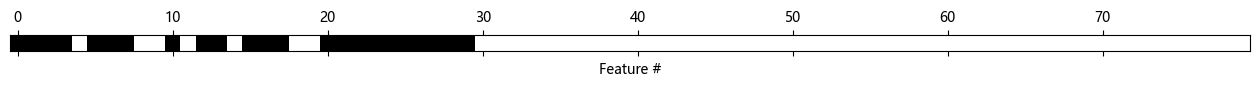

In [25]:

plt.matshow(select.get_support().reshape(1, -1), cmap='gray_r')
plt.xlabel("Feature #"); plt.yticks(());

<br>

按照模型自动选择特征建立模型

In [26]:
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

model = LogisticRegression(solver='lbfgs', max_iter=4000)
model.fit(X_train_selected, y_train)

print("Testing F1-score: ", f1_score(model.predict(X_test_selected), y_test))


print("\nCoefficients of features: ", model.coef_.shape, "\n", model.coef_)

Testing F1-score:  0.967032967032967

Coefficients of features:  (1, 23) 
 [[ 0.67330487  0.10813351 -0.15126163  0.02888194 -0.15328805 -0.34683218
  -0.1989962  -0.06059609  0.06298456 -0.06239964  0.03578595 -0.04303675
  -0.02923834  0.19241783 -0.28621114 -0.22065052 -0.01701432 -0.16470893
  -0.30951138 -0.88322241 -0.40191195 -0.46427894 -0.04620585]]


## 3. 迭代特征选择

`RFE`(Recursive Feature Elemination)，从所有特征开始构建模型，然后舍弃被选特征之外的所有特征构建新的模型，如此继续，知道剩下预设定的特征数量。

In [90]:
from sklearn.feature_selection import RFE

select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=40)

select.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=40)

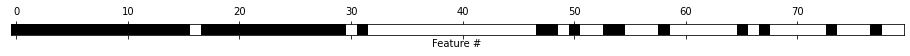

In [91]:

plt.matshow(select.get_support().reshape(1, -1), cmap='gray_r')
plt.xlabel("Feature #"); plt.yticks(());

<br>

按照迭代自动选择特征建立模型

In [92]:
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

model = LogisticRegression(solver='lbfgs', max_iter=4000)
model.fit(X_train_selected, y_train)

print("Testing F1-score: ", f1_score(model.predict(X_test_selected), y_test))


print("\nCoefficients of features: ", model.coef_.shape, "\n", model.coef_)

Testing F1-score:  0.953168044077135

Coefficients of features:  (1, 40) 
 [[ 0.38805453  0.14991785 -0.02137552  0.02490061 -0.06477934 -0.07878089
  -0.2053589  -0.12471342 -0.13969636 -0.01143088 -0.03278663  0.05383623
   0.2020021  -0.1372196  -0.01050083  0.04268597 -0.01318375 -0.00725602
   0.00751538  0.00332585 -0.4542636  -0.37646923 -0.01061002 -0.13506009
  -0.13599188 -0.49328888 -0.22854312 -0.19392866 -0.04492885 -0.17172708
  -0.48252499 -0.2856981  -0.17128782 -0.26286545  0.48574925  1.05413091
  -0.44131233  0.67798458  0.71038505  0.32120102]]


## 泄漏问题的讨论

假如数据**完全**来自随机，构造一个具有10000个特征的100条样本数据$X$作为自变量，同样随机100条作为因变量$y$

In [27]:
np.random.seed(0)
X = np.random.normal(size=(100, 10000))
y = np.random.normal(size=(100,))

<br>
下面是错误的特征选择

In [28]:
from sklearn.feature_selection import SelectPercentile, f_regression

select = SelectPercentile(score_func=f_regression, percentile=5)
select.fit(X, y)

X_selected = select.transform(X)

print("X_selected.shape: {}".format(X_selected.shape))

X_selected.shape: (100, 500)


In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

scores = cross_val_score(LinearRegression(), X_selected, y, cv=5)
print(scores)
np.mean(scores)

[0.84857304 0.94087349 0.88548744 0.94024405 0.91439864]


np.float64(0.9059153341384963)

In [31]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([("select", SelectPercentile(score_func=f_regression,
                                             percentile=5)),
                 ("ols", LinearRegression())])

scores = cross_val_score(pipe, X, y, cv=5)
print(scores)
np.mean(scores)

[-0.97495607 -0.03148493 -0.03978193  0.03017047 -0.21639143]


np.float64(-0.24648878004856356)